In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path_to_train_csv = "./IA2-train.csv"
path_to_dev_csv = "./IA2-dev.csv"

originalData = pd.read_csv(path_to_train_csv)
testData = pd.read_csv(path_to_dev_csv)

In [269]:
originalData.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1


## Data prepping

In [270]:
normalizeData = originalData.copy()
normalizeData['Age'] = (originalData['Age'] - originalData['Age'].mean()) / originalData['Age'].std()
normalizeData['Annual_Premium'] = (originalData['Annual_Premium'] - originalData['Annual_Premium'].mean()) / originalData['Annual_Premium'].std()
normalizeData['Vintage'] = (originalData['Vintage'] - originalData['Vintage'].mean()) / originalData['Vintage'].std()

normalizeData.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,-1.171848,1,0,1,-1.605168,0.382089,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0.242588,1,0,1,1.488182,-0.060277,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,-0.606074,1,0,1,1.103816,0.394044,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1.091249,1,0,1,0.844416,-0.789583,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,-0.606074,1,0,1,-1.605168,0.860322,0,0,...,0,0,0,0,0,0,0,0,0,1


In [271]:
validationData = testData
validationData['Age'] = (validationData['Age'] - originalData['Age'].mean()) / originalData['Age'].std()
validationData['Annual_Premium'] = (validationData['Annual_Premium'] - originalData['Annual_Premium'].mean()) / originalData['Annual_Premium'].std()
validationData['Vintage'] = (validationData['Vintage'] - originalData['Vintage'].mean()) / originalData['Vintage'].std()

validationData.head()


,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,0,-1.242570,1,1,0,-0.259802,1.230953,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,-0.040300,1,0,1,0.288714,1.338555,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,-0.747518,1,0,1,0.226259,0.406000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,-1.101127,1,1,0,-1.605168,0.274486,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.111021,1,0,1,1.489208,-1.638447,0,0,...,0,0,0,0,0,0,0,0,0,1


## Part 1

In [300]:
MAX_ITER = 5000
#MAX_ITER = 10000

#MIN_ERR = 0.05
MIN_ERR = 0.01
#MIN_ERR = 0.005

initialGuess = np.repeat(1.0, len(testData.columns) - 1)
## W0 = [1,1, ..., 1]

featureData = normalizeData.drop(['Response'], axis = 1)
featureValidationData = validationData.drop(['Response'], axis = 1)
## Get new dataset with only feature
def sigmoid(x):
    return 1/(1+np.exp(-x))
## define sigmoid function

def BGDLogic(inputData, resultData, initVector, maxIter, minErr, alphaRate, lambdaReg):
    iteration = 0
    dataSize = len(inputData)
    w = initVector.copy()
    gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
    normGradient = np.linalg.norm(gradientVector)
    while (normGradient > minErr and not np.isinf(normGradient) and iteration < maxIter):
        w = w + gradientVector
        for index, w_j in enumerate(w):
            if (index >= 1):
                w_j = w_j - alphaRate*lambdaReg*w_j
            w[index] = w_j
        gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
        normGradient = np.linalg.norm(gradientVector)
        iteration += 1
        print('Gradient: %9.7f, Iteration: [%d/%d]\r'%(normGradient,iteration,MAX_ITER), end="")
    return w
## Batch gradient descent L2

def getPrediction(W, features):
    predictionsArray = sigmoid(features.mul(W).sum(axis = 1))
    return list(map(lambda x: 1 if x >= 0.5 else 0, predictionsArray))

def getAccuracy(predictions, actual):
    return 1 - (np.count_nonzero(list(predictions - actual))/actual.size)

def roundingW(W):
    return list(map(lambda x: 0 if x < 1e-9 else x, W))
## Helper functions



In [273]:
wLambda0001 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.001)

trainAccWLambda0001 = getAccuracy(getPrediction(wLambda0001, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda0001)

valAccWLambda0001 = getAccuracy(getPrediction(wLambda0001, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda0001)


Gradient: 0.0099243, Iteration: [136/5000]
 Training accuracy: 0.7605

 Validating accuracy: 0.7585 


In [274]:
wLambda001 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.01)

trainAccWLambda001 = getAccuracy(getPrediction(wLambda001, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda001)

valAccWLambda001 = getAccuracy(getPrediction(wLambda001, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda001)


Gradient: 0.0099759, Iteration: [133/5000]
 Training accuracy: 0.7620

 Validating accuracy: 0.7611


In [275]:
wLambda01 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.1)

trainAccWLambda01 = getAccuracy(getPrediction(wLambda01, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda01)

valAccWLambda01 = getAccuracy(getPrediction(wLambda01, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda01)

Gradient: 0.0101192, Iteration: [5000/5000]
 Training accuracy: 0.7818

 Validating accuracy: 0.7829


In [276]:
wLambda1 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1)

trainAccWLambda1 = getAccuracy(getPrediction(wLambda1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1)

valAccWLambda1 = getAccuracy(getPrediction(wLambda1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda1)

Gradient: 0.0210566, Iteration: [5000/5000]
 Training accuracy: 0.7458

 Validating accuracy: 0.7467


In [277]:
wLambda10 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 10)

trainAccWLambda10 = getAccuracy(getPrediction(wLambda10, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda10)

valAccWLambda10 = getAccuracy(getPrediction(wLambda10, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda10)

Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066


In [278]:
wLambda100 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 100)

trainAccWLambda100 = getAccuracy(getPrediction(wLambda100, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda100)

valAccWLambda100 = getAccuracy(getPrediction(wLambda100, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda100)

/home/kingston/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/kingston/.local/lib/python3.6/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066


In [279]:
wLambda1000 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1000)

trainAccWLambda1000 = getAccuracy(getPrediction(wLambda1000, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1000)

valAccWLambda1000 = getAccuracy(getPrediction(wLambda1000, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda1000)

/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066


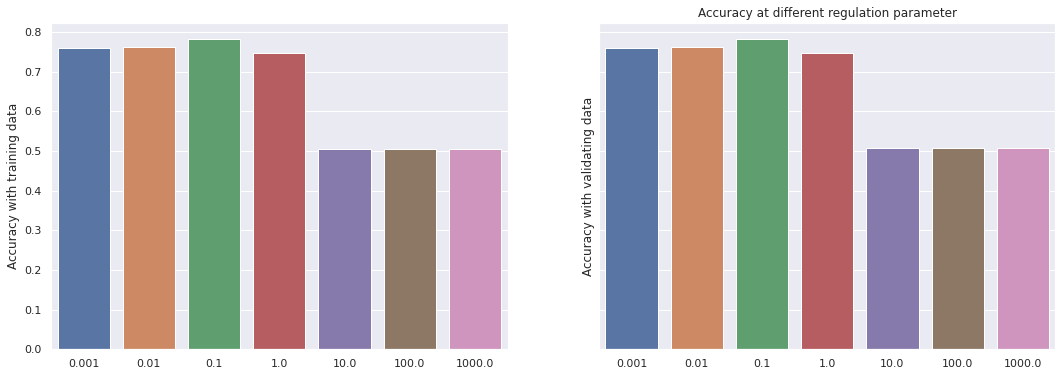

In [280]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
plt.title("Accuracy at different regulation parameter")

x1 = np.array([0.001,0.01,0.1,1,10,100,1000])
y1 = np.array([trainAccWLambda0001, trainAccWLambda001, trainAccWLambda01, trainAccWLambda1, trainAccWLambda10, trainAccWLambda100, trainAccWLambda1000])
sns.barplot(x=x1, y=y1, ax=ax1)
ax1.set_ylabel("Accuracy with training data")

x2 = np.array([0.001,0.01,0.1,1,10,100,1000])
y2 = np.array([valAccWLambda0001, valAccWLambda001, valAccWLambda01, valAccWLambda1, valAccWLambda10, valAccWLambda100, valAccWLambda1000])
sns.barplot(x=x2, y=y2, ax=ax2)
ax2.set_ylabel("Accuracy with validating data")
plt.show()

Most important weight:

In [293]:
FinalWStar = dict(zip(featureData.columns.values, wLambda01))
dict(sorted(FinalWStar.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Vehicle_Damage': 0.6537781293737365,
 'Previously_Insured': -0.6089915513308525,
 'dummy': -0.45229346731162584,
 'Policy_Sales_Channel_152': -0.24656406734309316,
 'Vehicle_Age_1': -0.22024894010793844,
 'Vehicle_Age_0': 0.14083026436755525,
 'Policy_Sales_Channel_26': 0.13353431460870874,
 'Policy_Sales_Channel_124': 0.12596340537230866,
 'Region_Code_28': 0.12104142132058336,
 'Policy_Sales_Channel_160': -0.0858898273286432,
 'Vehicle_Age_2': 0.07941877136931233,
 'Gender': 0.04652576022444731,
 'Annual_Premium': 0.043755584074209944,
 'Policy_Sales_Channel_157': 0.042728608847494104,
 'Policy_Sales_Channel_156': 0.03369227531802081,
 'Region_Code_50': -0.032356826996054945,
 'Vintage': -0.03172759056842435,
 'Policy_Sales_Channel_154': 0.026946581279115433,
 'Region_Code_8': -0.02242925699261465,
 'Region_Code_3': 0.02145677454472716,
 'Region_Code_15': -0.02088609928905947,
 'Region_Code_46': -0.018256416363279272,
 'Policy_Sales_Channel_163': 0.017216381302118448,
 'Region_Code

In [297]:
FinalWDash = dict(zip(featureData.columns.values, wLambda0001))
dict(sorted(FinalWDash.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Policy_Sales_Channel_157': 1.0151831763630268,
 'Policy_Sales_Channel_156': 0.9974811480081618,
 'Region_Code_34': 0.990322338235573,
 'Policy_Sales_Channel_163': 0.9887014651800482,
 'Region_Code_51': 0.9877496038106908,
 'Region_Code_19': 0.9876858198470038,
 'Policy_Sales_Channel_40': 0.9872551948826513,
 'Region_Code_38': 0.9870625719016043,
 'Policy_Sales_Channel_60': 0.9870099433242661,
 'Policy_Sales_Channel_56': 0.9870032100686335,
 'Policy_Sales_Channel_130': 0.9869832010922863,
 'Policy_Sales_Channel_59': 0.9869684248961677,
 'Policy_Sales_Channel_47': 0.9869531446312572,
 'Policy_Sales_Channel_111': 0.9868395978847052,
 'Policy_Sales_Channel_103': 0.986795415899312,
 'Policy_Sales_Channel_94': 0.986755076149284,
 'Policy_Sales_Channel_86': 0.9866858190322499,
 'Policy_Sales_Channel_17': 0.9866687750881092,
 'Policy_Sales_Channel_2': 0.986491391319791,
 'Policy_Sales_Channel_20': 0.986491391319791,
 'Policy_Sales_Channel_27': 0.986491391319791,
 'Policy_Sales_Channel_28': 0

In [298]:
FinalWPlus = dict(zip(featureData.columns.values, wLambda1))
dict(sorted(FinalWPlus.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Vehicle_Damage': 0.10847828002381119,
 'Previously_Insured': -0.10237412666106924,
 'dummy': -0.09590290900411225,
 'Vehicle_Age_1': -0.05556320790239734,
 'Policy_Sales_Channel_152': -0.05503011826806517,
 'Age': 0.04982208194991651,
 'Vehicle_Age_0': 0.04241722553771404,
 'Region_Code_28': 0.029295305842208467,
 'Policy_Sales_Channel_26': 0.027169298551635697,
 'Policy_Sales_Channel_124': 0.02566130668647596,
 'Annual_Premium': 0.01652486108370886,
 'Gender': 0.013326236527481718,
 'Vehicle_Age_2': 0.013145982364683149,
 'Policy_Sales_Channel_160': -0.012019518170953779,
 'Vintage': -0.008828005977752611,
 'Policy_Sales_Channel_157': 0.00555539903296735,
 'Policy_Sales_Channel_156': 0.005041269984378271,
 'Region_Code_50': -0.0042901785211999464,
 'Policy_Sales_Channel_154': 0.0036889525330539214,
 'Region_Code_30': -0.0030257671529591024,
 'Region_Code_15': -0.0030233631613937727,
 'Region_Code_46': -0.002902306192718063,
 'Region_Code_8': -0.0028848588248727783,
 'Policy_Sales_Ch

Sparcity Report: (assuming near 0 weight is 0 at 1e-9

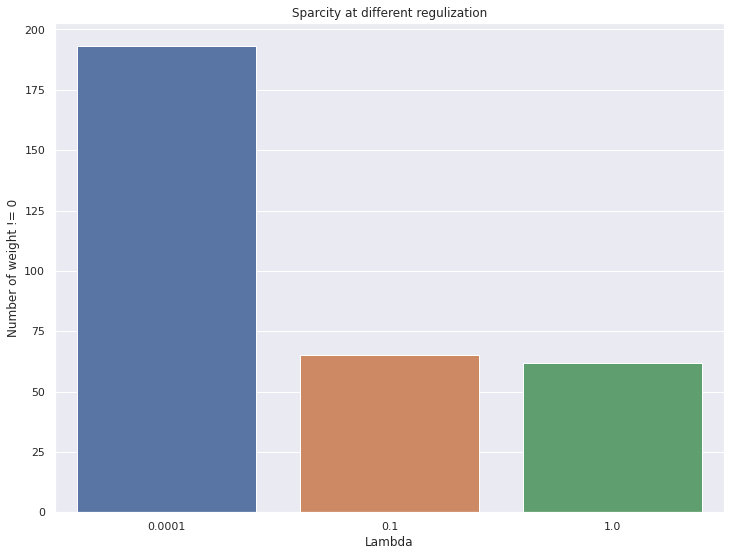

In [303]:
plt.subplots(figsize=(12, 9))
plt.title("Sparcity at different regulization")
ax = sns.barplot(x = np.array([0.0001,0.1,1]), y = np.array([np.count_nonzero(roundingW(wLambda0001)), np.count_nonzero(roundingW(wLambda01)), np.count_nonzero(roundingW(wLambda1))]))
ax.set(xlabel='Lambda', ylabel='Number of weight != 0')
plt.show()

## Part 2

In [307]:
def BGDLogicL1(inputData, resultData, initVector, maxIter, minErr, alphaRate, lambdaReg):
    iteration = 0
    dataSize = len(inputData)
    w = initVector.copy()
    gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
    normGradient = np.linalg.norm(gradientVector)
    while (normGradient > minErr and not np.isinf(normGradient) and iteration < maxIter):
        w = w + gradientVector
        for index, w_j in enumerate(w):
            if (index >= 1):
                if w_j >= 0:
                    w_j = max(np.absolute(w_j) - alphaRate*lambdaReg,0)
                else:
                    w_j = -max(np.absolute(w_j) - alphaRate*lambdaReg,0)
            w[index] = w_j
        gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
        normGradient = np.linalg.norm(gradientVector)
        iteration += 1
        print('Gradient: %9.7f, Iteration: [%d/%d]\r'%(normGradient,iteration,MAX_ITER), end="")
    return w
## Batch gradient descent L1

In [308]:
wLambda0001L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.001)

trainAccWLambda0001 = getAccuracy(getPrediction(wLambda0001L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda0001)

valAccWLambda0001 = getAccuracy(getPrediction(wLambda0001L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda0001)


Gradient: 0.0099798, Iteration: [135/5000]
 Training accuracy: 0.7597

 Validating accuracy: 0.7581 


In [309]:
wLambda001L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.01)

trainAccWLambda001 = getAccuracy(getPrediction(wLambda001L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda001)

valAccWLambda001 = getAccuracy(getPrediction(wLambda001L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda001)


Gradient: 0.0099280, Iteration: [132/5000]
 Training accuracy: 0.7640

 Validating accuracy: 0.7604 


In [311]:
wLambda01L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.1)

trainAccWLambda01 = getAccuracy(getPrediction(wLambda01L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda01)

valAccWLambda01 = getAccuracy(getPrediction(wLambda01L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda01)


Gradient: 0.0197266, Iteration: [5000/5000]
 Training accuracy: 0.7703

 Validating accuracy: 0.7723 
